In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 

In [3]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [2]:
# merging these two data sets
full_match=delivery.merge(match,left_on='match_id',right_on='id')
full_match.head()

NameError: name 'delivery' is not defined

In [4]:
# problem 1 : to find purple cap holders per season
full_match.groupby(['season','bowler'])['player_dismissed'].count().reset_index().sort_values(['season','player_dismissed'],ascending=False).drop_duplicates(subset='season',keep='first').sort_values('season')[['season','bowler']]

,season,bowler
84,2008,Sohail Tanvir
174,2009,RP Singh
284,2010,PP Ojha
447,2011,SL Malinga
537,2012,M Morkel
629,2013,DJ Bravo
780,2014,MM Sharma
848,2015,DJ Bravo
939,2016,B Kumar
1049,2017,B Kumar


In [5]:
# problem 2  top 10 batsman vs top 10 bowler in ipl


In [6]:
# finding top batsman in terms of maxmium runs
top_batsman=full_match.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

In [7]:
# finding top bowler in terms of maximum wickets
dismissal=['bowled','caught','caught and bowled','stumped','lbw','hit wicket']
wickets=full_match[full_match['dismissal_kind'].isin(dismissal)]  # actual wickets by bowler
top_bowler=wickets.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)



In [8]:
# finding dataframe for top 10 batsman
top_batsman_data=(full_match[full_match['batsman'].isin(top_batsman.index.tolist())])
top_batsman_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150414,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,3,V Kohli,AB de Villiers,BB Sran,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150415,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,4,V Kohli,AB de Villiers,BB Sran,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150416,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,5,V Kohli,AB de Villiers,BB Sran,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150420,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,14,3,AB de Villiers,KL Rahul,Bipul Sharma,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [9]:
# finding dataframe for top 10 batsman vs top 10 bowler
required_data=top_batsman_data[top_batsman_data['bowler'].isin(top_bowler.index.tolist())]
required_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
131,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,Mandeep Singh,B Kumar,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
132,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,Mandeep Singh,B Kumar,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
133,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,Mandeep Singh,B Kumar,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
137,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,1,CH Gayle,Mandeep Singh,A Nehra,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150352,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,3,V Kohli,CH Gayle,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150353,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,4,V Kohli,CH Gayle,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150354,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,5,CH Gayle,V Kohli,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150355,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,6,CH Gayle,V Kohli,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [10]:
# forming a pivot table
pivot=required_data.pivot_table(index='bowler',columns='batsman',values='batsman_runs',aggfunc='sum')
pivot

batsman,AB de Villiers,CH Gayle,DA Warner,G Gambhir,MS Dhoni,RG Sharma,RV Uthappa,S Dhawan,SK Raina,V Kohli
bowler,,,,,,,,,,
A Mishra,9.0,45.0,37.0,54.0,24.0,78.0,84.0,16.0,83.0,149.0
A Nehra,61.0,45.0,25.0,27.0,76.0,62.0,55.0,42.0,15.0,60.0
B Kumar,48.0,104.0,2.0,84.0,81.0,31.0,65.0,14.0,62.0,53.0
DJ Bravo,69.0,53.0,44.0,32.0,55.0,66.0,32.0,48.0,55.0,130.0
Harbhajan Singh,80.0,78.0,97.0,84.0,47.0,8.0,75.0,103.0,132.0,78.0
PP Chawla,43.0,103.0,72.0,53.0,72.0,136.0,41.0,46.0,152.0,95.0
R Ashwin,42.0,49.0,48.0,43.0,NaN,70.0,72.0,51.0,12.0,127.0
R Vinay Kumar,16.0,0.0,5.0,62.0,33.0,22.0,65.0,24.0,98.0,26.0
SL Malinga,76.0,47.0,74.0,39.0,75.0,4.0,66.0,75.0,69.0,25.0


Text(0.5, 1, 'Top 10 batmen vs Top 10 bowlers ')

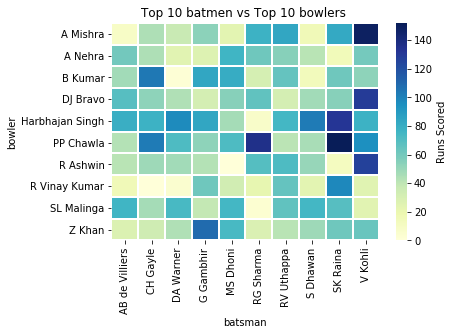

In [32]:
# creating the heat map


sns.heatmap(pivot.fillna(value=0),cmap="YlGnBu",linewidths=1, cbar_kws={'label': 'Runs Scored'}).set_title("Top 10 batmen vs Top 10 bowlers ")